In [1]:
import sqlite3
import pandas as pd

# List of ticker symbols
tickers = ['MSFT', 'AAPL', 'TSLA', 'NVDA']

# Connect to SQLite database
conn = sqlite3.connect('stock_data.db')

# Initialize an empty list to store dataframes
dfs = []

# Loop through tickers and fetch data
for ticker in tickers:
    cursor = conn.cursor()
    cursor.execute(f"SELECT Date, Close, Open, Volume, High, Low, MA5, MA10 FROM new_prices WHERE StockName='{ticker}' and Date>='2023-01-01' and Date<='2024-03-15' ") #AND RSI IS NOT NULL AND MA20 IS NOT NULL
    data = cursor.fetchall()
    
    # Convert data to DataFrame
    df = pd.DataFrame(data, columns=['Date', 'Close','Open', 'Volume', 'High', 'Low', 'MA5', 'MA10'])
    
    # Add ticker symbol column
    df['Symbol'] = ticker
    
    # Append DataFrame to list
    dfs.append(df)

# Close database connection
conn.close()

# Concatenate dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)



In [2]:
combined_df

,Date,Close,Open,Volume,High,Low,MA5,MA10,Symbol
0,2023-01-03 00:00:00,239.580002,243.080002,25740000,245.750000,237.399994,238.380002,239.550000,MSFT
1,2023-01-04 00:00:00,229.100006,232.279999,50623400,232.869995,225.960007,236.808002,238.415001,MSFT
2,2023-01-05 00:00:00,222.309998,227.199997,39585600,227.550003,221.759995,234.364001,236.466000,MSFT
3,2023-01-06 00:00:00,224.929993,223.000000,43613600,225.759995,219.350006,231.148001,234.516000,MSFT
4,2023-01-09 00:00:00,227.119995,226.449997,27369800,231.240005,226.410004,228.607999,233.409000,MSFT
...,...,...,...,...,...,...,...,...,...
1199,2024-03-08 00:00:00,875.280029,951.380005,113299600,974.000000,865.059998,880.196008,836.945001,NVDA
1200,2024-03-11 00:00:00,857.739990,864.289978,67836400,887.969971,841.659973,881.270007,843.627002,NVDA
1201,2024-03-12 00:00:00,919.130005,880.489990,66807500,919.599976,861.500000,893.168005,856.839001,NVDA
1202,2024-03-13 00:00:00,908.880005,910.549988,63571300,915.039978,884.349976,897.544006,870.064001,NVDA


In [3]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

combined_df.set_index('Date')
# Display combined dataframe
print(combined_df)

df = combined_df.copy()

           Date       Close        Open     Volume        High         Low  \
0    2023-01-03  239.580002  243.080002   25740000  245.750000  237.399994   
1    2023-01-04  229.100006  232.279999   50623400  232.869995  225.960007   
2    2023-01-05  222.309998  227.199997   39585600  227.550003  221.759995   
3    2023-01-06  224.929993  223.000000   43613600  225.759995  219.350006   
4    2023-01-09  227.119995  226.449997   27369800  231.240005  226.410004   
...         ...         ...         ...        ...         ...         ...   
1199 2024-03-08  875.280029  951.380005  113299600  974.000000  865.059998   
1200 2024-03-11  857.739990  864.289978   67836400  887.969971  841.659973   
1201 2024-03-12  919.130005  880.489990   66807500  919.599976  861.500000   
1202 2024-03-13  908.880005  910.549988   63571300  915.039978  884.349976   
1203 2024-03-14  879.440002  895.770020   60231800  906.460022  866.000000   

             MA5        MA10 Symbol  
0     238.380002  239.550

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1204 non-null   datetime64[ns]
 1   Close   1204 non-null   float64       
 2   Open    1204 non-null   float64       
 3   Volume  1204 non-null   int64         
 4   High    1204 non-null   float64       
 5   Low     1204 non-null   float64       
 6   MA5     1204 non-null   float64       
 7   MA10    1204 non-null   float64       
 8   Symbol  1204 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 84.8+ KB


In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1204 non-null   datetime64[ns]
 1   Close   1204 non-null   float64       
 2   Open    1204 non-null   float64       
 3   Volume  1204 non-null   int64         
 4   High    1204 non-null   float64       
 5   Low     1204 non-null   float64       
 6   MA5     1204 non-null   float64       
 7   MA10    1204 non-null   float64       
 8   Symbol  1204 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 84.8+ KB


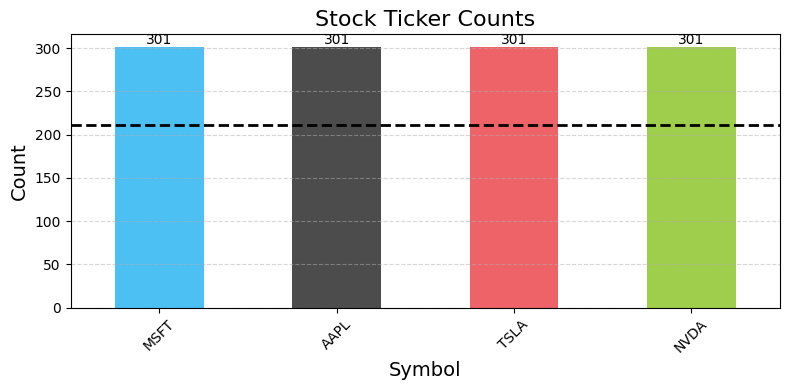

In [6]:
import matplotlib.pyplot as plt

# Dictionary mapping ticker symbols to colors
ticker_colors = {
    'TSLA': '#E82127',
    'AAPL': '#000000',
    'MSFT': '#00A4EF',
    'NVDA': '#76B900'
}
# Assuming your DataFrame is named 'df'
symbol_counts = df['Symbol'].value_counts()

plt.figure(figsize=(8, 4))

# Plotting the bars with custom colors and some transparency
bars = symbol_counts.plot(kind='bar', color=[ticker_colors.get(symbol, '#607D8B') for symbol in symbol_counts.index], alpha=0.7)

plt.title('Stock Ticker Counts', fontsize=16)
plt.xlabel('Symbol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding grid lines

# Annotate each bar with its count
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points',
                 fontsize=10)

# Calculate 70% of the total count
total_count = symbol_counts.max()
seventy_percent_count = 0.7 * total_count

# Plot a horizontal line at 70% of the total count
plt.axhline(y=seventy_percent_count, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig("images/ticker_counts.png", dpi=300, bbox_inches='tight', pad_inches=0.2, transparent=True)  # Save as PNG with transparency
plt.show()


In [7]:
from tabulate import tabulate

# Assuming df is your DataFrame
description_table = df.describe().reset_index()

# Format the table using tabulate
table = tabulate(description_table, headers='keys', tablefmt='plain', showindex=False, floatfmt="0.2f")

# Print the formatted table
print(table)


index    Date                             Close     Open        Volume     High      Low      MA5     MA10
count    1204                           1204.00  1204.00       1204.00  1204.00  1204.00  1204.00  1204.00
mean     2023-08-08 15:13:45.249169408   284.51   284.11   66666277.41   288.17   280.20   282.81   280.73
min      2023-01-03 00:00:00             108.10   103.00   10176600.00   111.75   101.81   112.98   115.06
25%      2023-04-21 00:00:00             185.63   185.46   35229700.00   187.31   183.49   185.78   186.15
50%      2023-08-09 00:00:00             249.76   249.14   50882050.00   254.01   244.93   250.22   248.43
75%      2023-11-24 00:00:00             345.14   345.72   92418075.00   347.77   340.36   340.10   338.59
max      2024-03-14 00:00:00             926.69   951.38  306590600.00   974.00   896.02   897.54   878.90
std      nan                             131.18   131.16   45227548.88   133.25   128.71   128.77   125.77


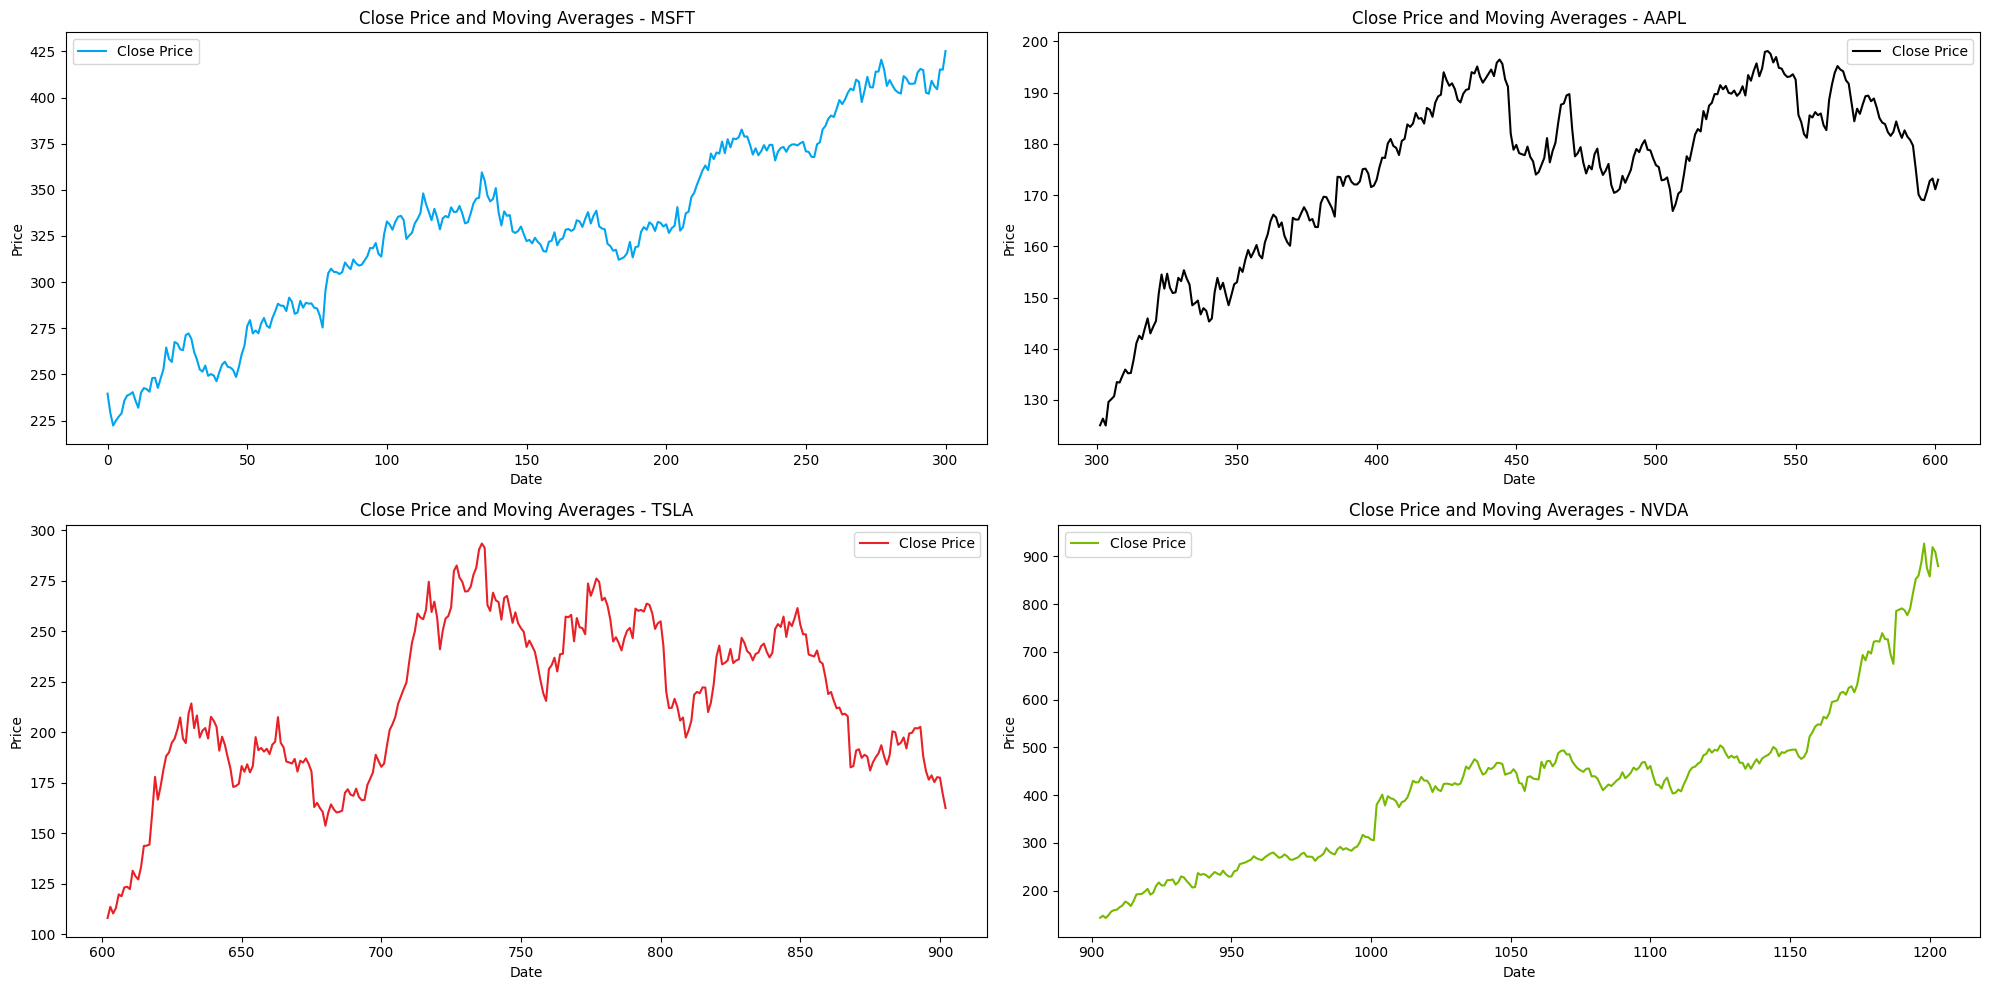

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of ticker symbols
tickers = df['Symbol'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each ticker symbol
for i, ticker in enumerate(tickers):
    # Filter data for the current ticker symbol
    data = df[df['Symbol'] == ticker]
    
    # Plot Close price distribution
    sns.lineplot(data=data, x=data.index, y='Close', ax=axes[i], color=ticker_colors.get(ticker, '#607D8B'), label='Close Price')
    # sns.lineplot(data=data, x=data.index, y='MA5', ax=axes[i], color='red', label='MA5')
    # sns.lineplot(data=data, x=data.index, y='MA10', ax=axes[i], color='green', label='MA10')
    axes[i].set_title(f'Close Price and Moving Averages - {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    

# Adjust layout
plt.tight_layout()

# Define the path for saving the image
image_path = 'images/OpenClosePrice_LineGraph.png'

# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()


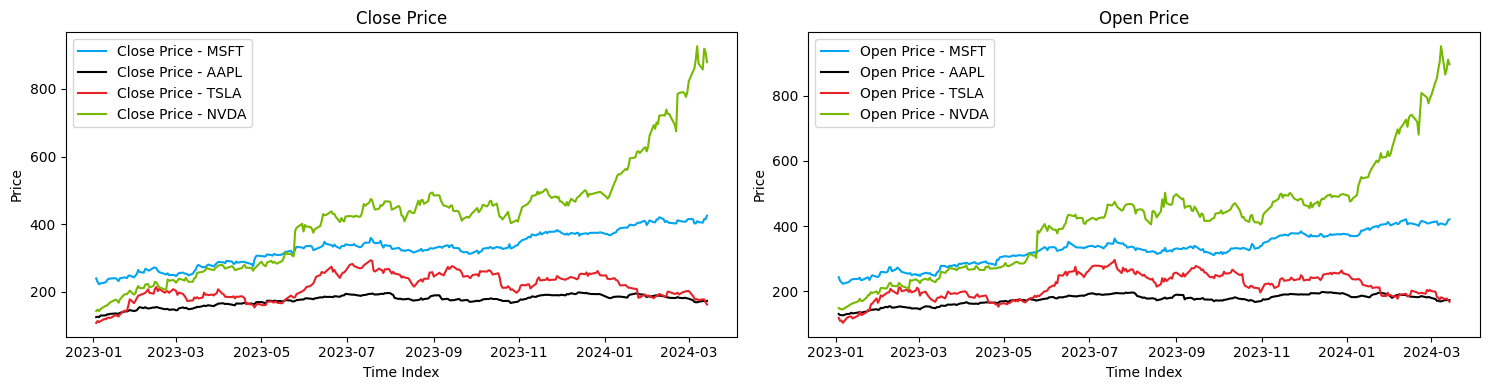

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
tickers = df['Symbol'].unique()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# Loop through each ticker symbol
for ticker in tickers:
    # Filter data for the current ticker symbol
    data = df[df['Symbol'] == ticker].reset_index()
    
    # Plot Close price on the first subplot
    sns.lineplot(data=data, x=data['Date'], y='Close', ax=axes[0], color=ticker_colors.get(ticker, '#607D8B'), label=f'Close Price - {ticker}')
    
    # Plot Open price on the second subplot
    sns.lineplot(data=data, x=data['Date'], y='Open', ax=axes[1], color=ticker_colors.get(ticker, '#607D8B'), label=f'Open Price - {ticker}')
    
# Set titles and labels for the first subplot
axes[0].set_title('Close Price')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Price')

# Set titles and labels for the second subplot
axes[1].set_title('Open Price')
axes[1].set_xlabel('Time Index')
axes[1].set_ylabel('Price')

# Show legend for both subplots
axes[0].legend()
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('images/prices.png', dpi=300)
# Show plot
plt.show()


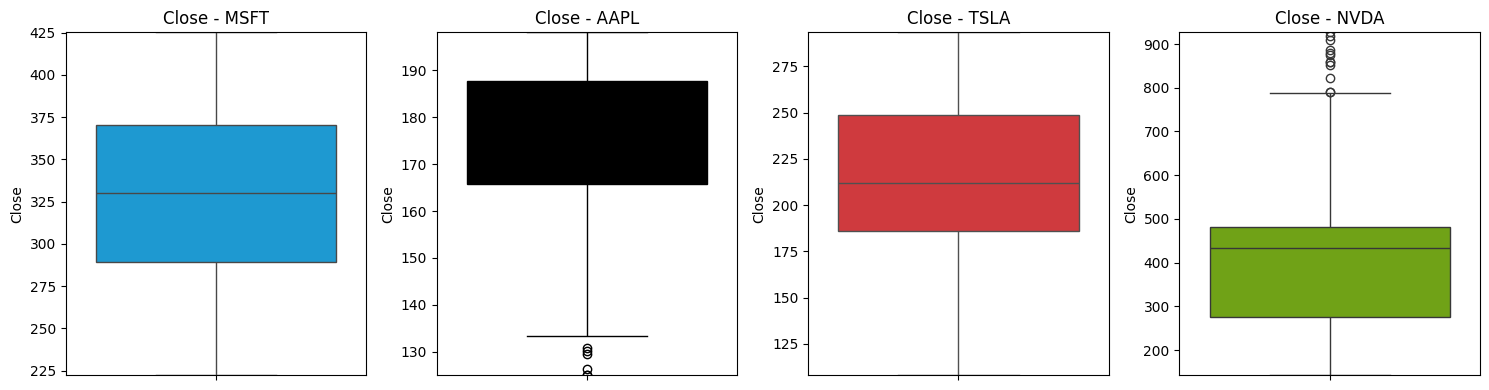

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of ticker symbols
tickers = df['Symbol'].unique()

# Calculate the number of rows and columns needed for subplots
num_plots = 1
num_cols = 4  # Number of box plots per row

# Create subplots
fig, axes = plt.subplots(nrows=num_plots, ncols=num_cols, figsize=(15, 4))

# Loop through each ticker symbol
for i, ticker in enumerate(tickers):
    # Filter data for the current ticker symbol
    data = df[df['Symbol'] == ticker]
    
    # Calculate the maximum and minimum values for y-axis
    y_max = data[[ 'Close']].max().max()
    y_min = data[[ 'Close']].min().min()
    
    # Plot box plot for each column
    for j, col in enumerate([ 'Close']):
        sns.boxplot(y=data[col], ax=axes[i], color=ticker_colors.get(ticker, '#607D8B'))
        axes[i].set_title(f'{col} - {ticker}')
        
        # Set the same y-axis limits for all subplots
        axes[i].set_ylim(y_min, y_max)

# Remove empty subplots
for i in range(num_plots):
    for j in range(num_cols, 4):
        fig.delaxes(axes[i, j])

# Adjust layout
plt.tight_layout()
plt.savefig("images/box_plot_close.png", dpi=300)
# Show plot
plt.show()


# Capturing the trend ..

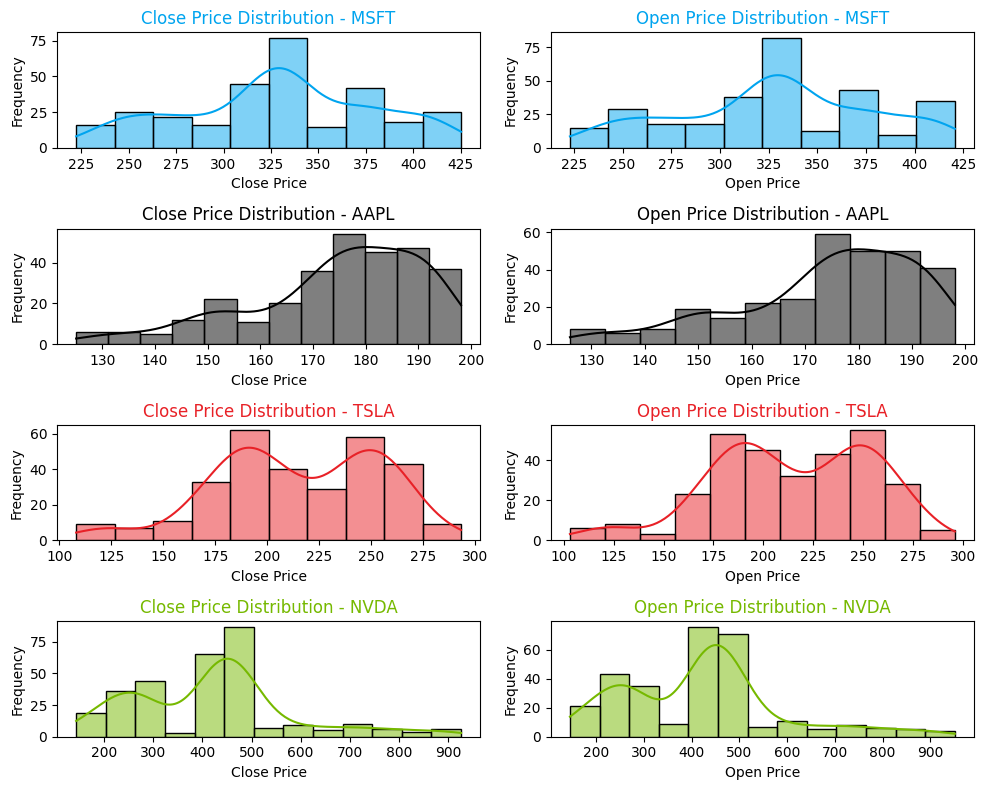

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of ticker symbols
tickers = df['Symbol'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(10, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each ticker symbol
for i, ticker in enumerate(tickers):
    # Filter data for the current ticker symbol
    data = df[df['Symbol'] == ticker]
    
    # Plot Close price distribution
    sns.histplot(data['Close'], ax=axes[i*2], kde=True, color=ticker_colors[ticker])
    axes[i*2].set_title(f'Close Price Distribution - {ticker}', color=ticker_colors[ticker])
    axes[i*2].set_xlabel('Close Price')
    axes[i*2].set_ylabel('Frequency')
    
    # Plot Open price distribution
    sns.histplot(data['Open'], ax=axes[i*2+1], kde=True, color=ticker_colors[ticker])
    axes[i*2+1].set_title(f'Open Price Distribution - {ticker}', color=ticker_colors[ticker])
    axes[i*2+1].set_xlabel('Open Price')
    axes[i*2+1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Define the path for saving the image
image_path = 'images/Open_Close_Price_Analysis.png'

# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()


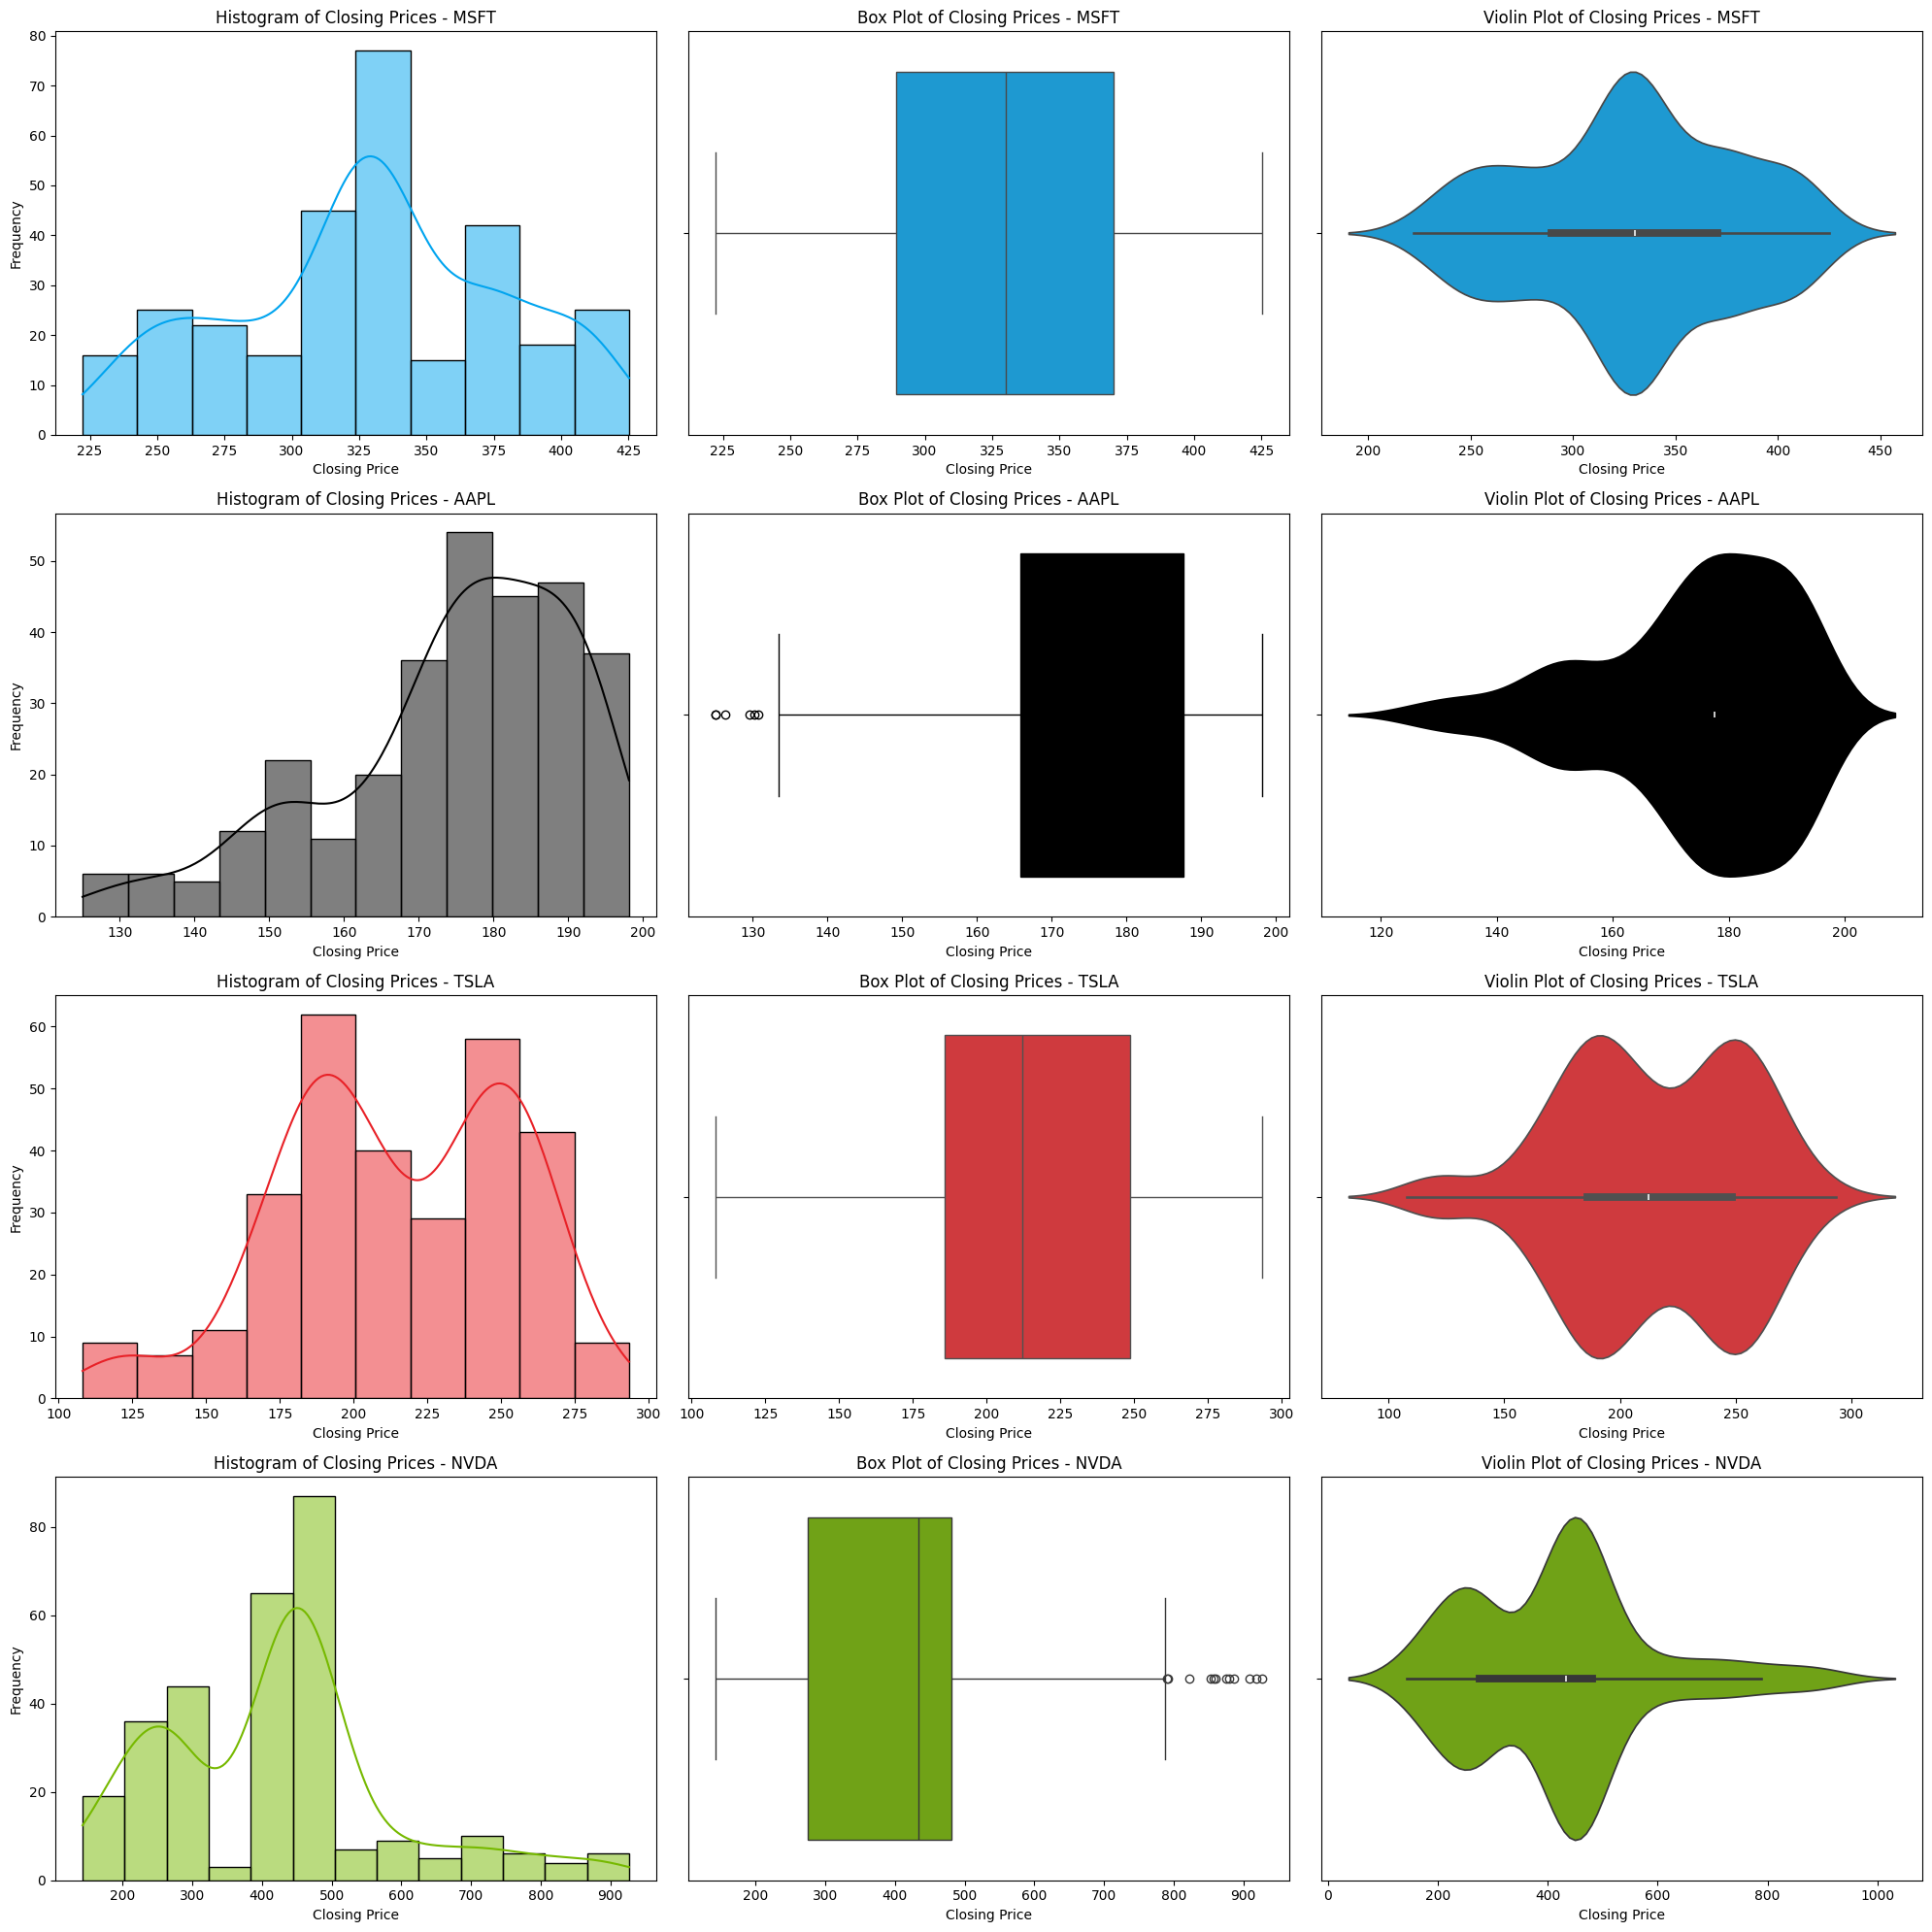

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of ticker symbols
tickers = df['Symbol'].unique()

# Set up the subplots
fig, axes = plt.subplots(nrows=len(tickers), ncols=3, figsize=(20, 5*len(tickers)))

# Loop through each ticker symbol
for i, ticker in enumerate(tickers):
    ticker_data = df[df['Symbol'] == ticker]['Close']
    price_stats = ticker_data.describe()
    
    # Visualize the distribution of prices using histograms
    sns.histplot(ticker_data, kde=True, color=ticker_colors[ticker], ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of Closing Prices - {ticker}')
    axes[i, 0].set_xlabel('Closing Price')
    axes[i, 0].set_ylabel('Frequency')

    # Visualize the distribution of prices using box plots
    sns.boxplot(x=ticker_data, color=ticker_colors[ticker], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of Closing Prices - {ticker}')
    axes[i, 1].set_xlabel('Closing Price')

    # Visualize the distribution of prices using violin plots
    sns.violinplot(x=ticker_data, color=ticker_colors[ticker], ax=axes[i, 2])
    axes[i, 2].set_title(f'Violin Plot of Closing Prices - {ticker}')
    axes[i, 2].set_xlabel('Closing Price')

    # # Print statistics
    # print(f"Price Statistics for {ticker}:")
    # print(price_stats)

# Adjust layout
plt.tight_layout()


# Define the path for saving the image
image_path = 'images/price_distribution.png'

# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()


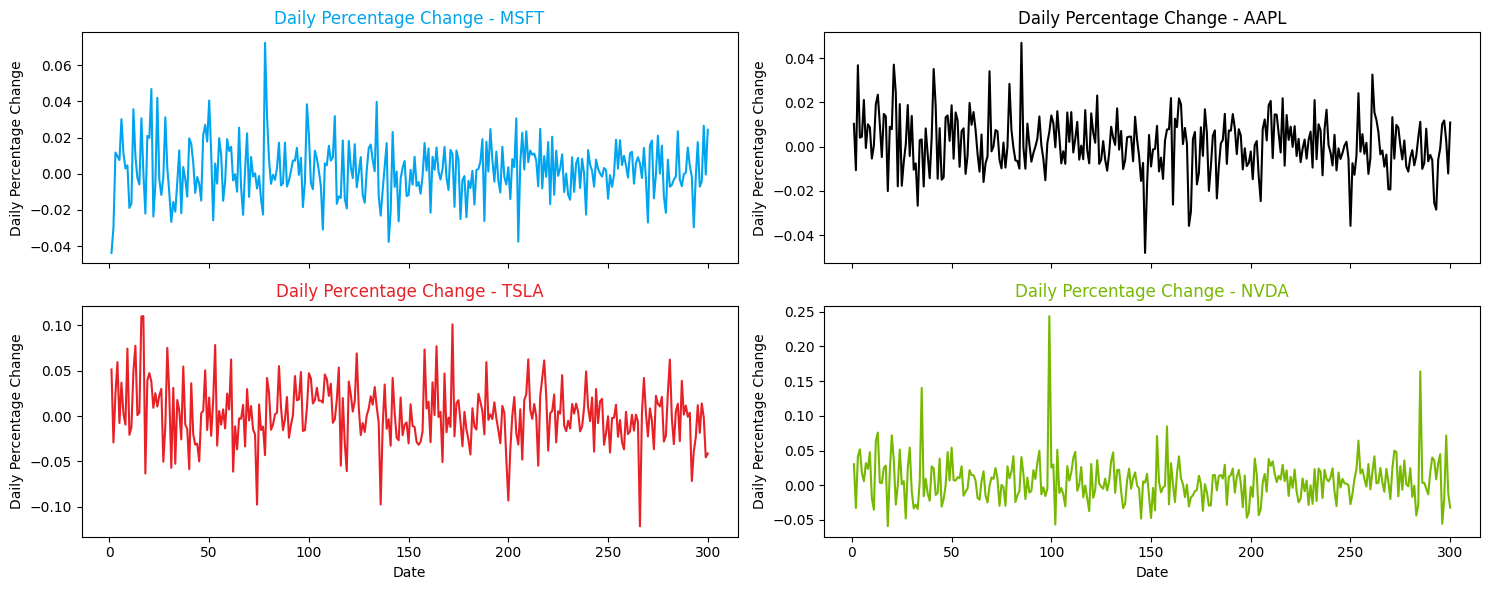

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of ticker symbols
tickers = df['Symbol'].unique()

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), sharex=True)

# Loop through each ticker symbol
for i, ticker in enumerate(tickers):
    # Compute daily price movements for the current ticker
    ticker_data = df[df['Symbol'] == ticker].reset_index()
    daily_movement = ticker_data['Close'].diff()
    daily_pct_change = ticker_data['Close'].pct_change()
    
    # Compute the position of the subplot in the grid
    row = i // 2
    col = i % 2
    
    # Visualize the daily price movement using a line plot
    sns.lineplot(x=ticker_data.index, y=daily_pct_change, color=ticker_colors[ticker], ax=axes[row, col])
    axes[row, col].set_title(f'Daily Percentage Change - {ticker}', color=ticker_colors[ticker])
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Daily Percentage Change')

# Adjust layout
plt.tight_layout()
plt.savefig('images/daily_pct_change.png', dpi=300)
# Show plots
plt.show()


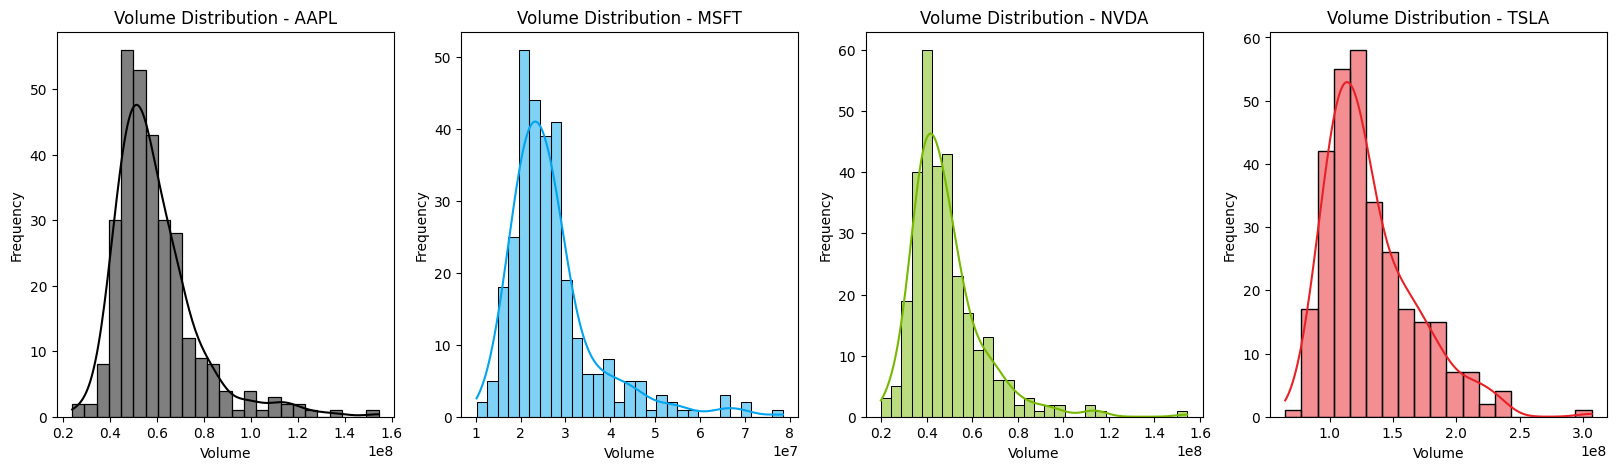

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics for trading volume
volume_stats = df.groupby('Symbol')['Volume'].describe()

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(volume_stats), figsize=(20, 5))

# Loop through each ticker symbol
for i, (ticker, stats) in enumerate(volume_stats.iterrows()):
    # Filter data for the current ticker
    ticker_data = df[df['Symbol'] == ticker]
    
    # Visualize the distribution of trading volumes using histograms
    sns.histplot(ticker_data['Volume'], kde=True, color=ticker_colors[ticker], ax=axes[i])
    axes[i].set_title(f'Volume Distribution - {ticker}')
    axes[i].set_xlabel('Volume')
    axes[i].set_ylabel('Frequency')

    # # Print statistics
    # print(f"Volume Statistics for {ticker}:")
    # print(stats)


# Define the path for saving the image
image_path = 'images/volume_distributions.png'

# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()

In [15]:
df_returns = combined_df.pivot(index='Date', columns='Symbol', values='Close').pct_change()
df_returns.dropna(inplace=True)
df_returns

Symbol,AAPL,MSFT,NVDA,TSLA
Date,,,,
2023-01-04,0.010314,-0.043743,0.030318,0.051249
2023-01-05,-0.010605,-0.029638,-0.032816,-0.029039
2023-01-06,0.036794,0.011785,0.041640,0.024651
2023-01-09,0.004089,0.009736,0.051753,0.059349
2023-01-10,0.004456,0.007617,0.017981,-0.007681
...,...,...,...,...
2024-03-08,0.010237,-0.007137,-0.055477,-0.018528
2024-03-11,0.011832,-0.004185,-0.020039,0.013859
2024-03-12,0.002779,0.026599,0.071572,-0.001294


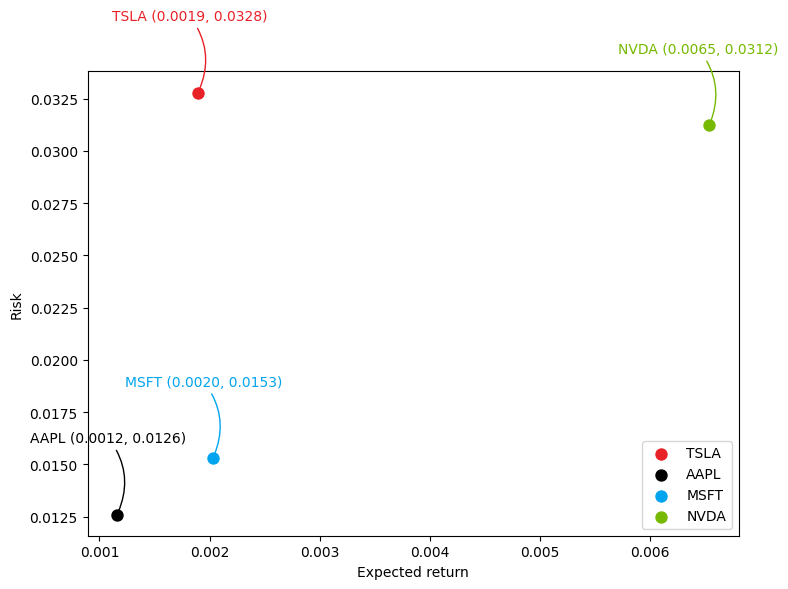

In [32]:
import numpy as np
import matplotlib.pyplot as plt

rets = df_returns.dropna()
ticker_colors = {
    'TSLA': '#E82127',
    'AAPL': '#000000',
    'MSFT': '#00A4EF',
    'NVDA': '#76B900'
}

area = np.pi * 20

plt.figure(figsize=(8, 6))
for ticker, color in ticker_colors.items():
    plt.scatter(rets.mean()[ticker], rets.std()[ticker], s=area, c=color, label=ticker)

plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.legend(loc='lower right')

for ticker, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(f'{ticker} ({rets.mean()[ticker]:.4f}, {rets.std()[ticker]:.4f})', xy=(x, y), color=ticker_colors[ticker], 
                 xytext=(0, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color=ticker_colors[ticker], connectionstyle='arc3,rad=-0.3'))
plt.tight_layout()
plt.show()


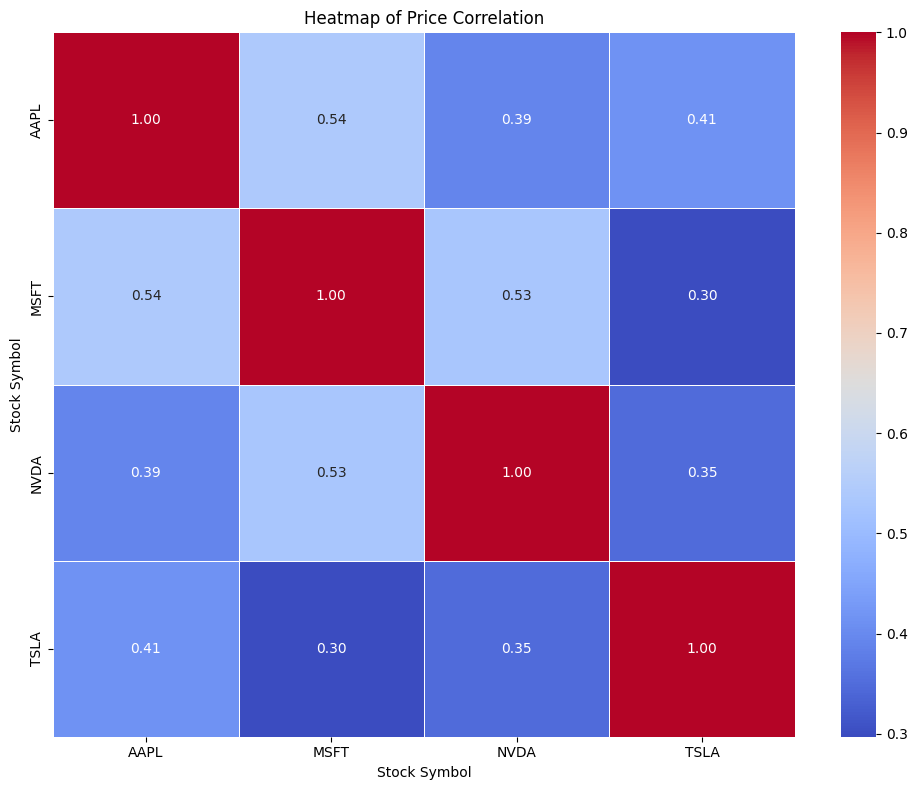

In [17]:
import seaborn as sns

# Compute the correlation matrix of daily price movements
correlation_matrix = combined_df.pivot(index='Date', columns='Symbol', values='Close').pct_change().corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Price Correlation')
plt.xlabel('Stock Symbol')
plt.ylabel('Stock Symbol')
# Define the path for saving the image
image_path = 'images/heatmap.png'
plt.tight_layout()
# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()


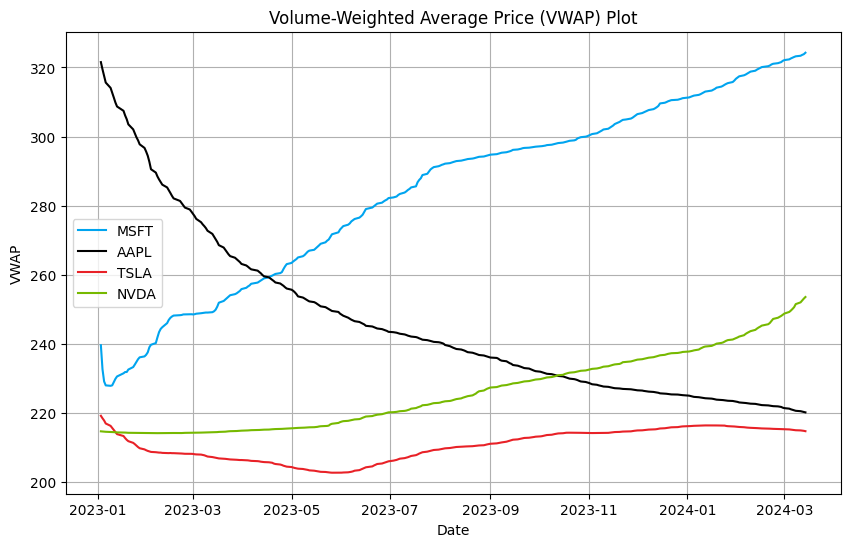

In [18]:
import matplotlib.pyplot as plt

# Define colors for each stock
colors = {'MSFT': 'blue', 'AAPL': 'green', 'TSLA': 'red', 'NVDA': 'purple', 'META': 'orange', 'GOOG': 'cyan'}

# Calculate VWAP for each stock
df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

# Plot VWAP for each stock with specified colors
plt.figure(figsize=(10, 6))
for symbol in df['Symbol'].unique():
    symbol_data = df[df['Symbol'] == symbol]
    plt.plot(symbol_data['Date'], symbol_data['VWAP'], label=symbol, color=ticker_colors[symbol])

plt.title('Volume-Weighted Average Price (VWAP) Plot')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
# Define the path for saving the image
image_path = 'images/VWAP.png'

# Save the combined candlestick charts as a single image
plt.savefig(image_path)

# Show plots
plt.show()
